Generating Sparsity Plot...


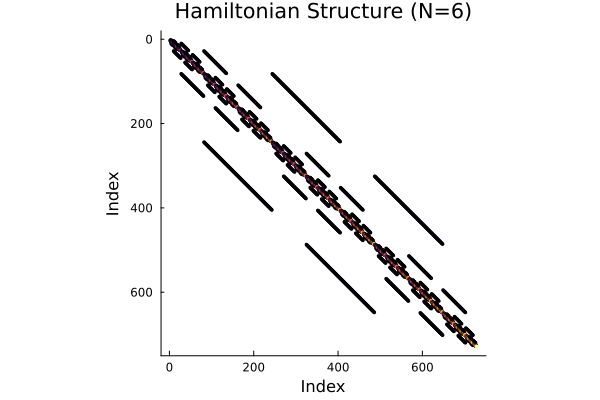

Saved sparsity_pattern.png


In [4]:
using QuantumOptics
using Plots

function draw_sparsity()
    # 1. Build a small system (N=6)
    N = 6
    wc = 1.0
    J = 0.1
    cutoff = 3
    
    b = FockBasis(cutoff - 1)
    b_sys = tensor([b for i in 1:N]...)
    
    a = destroy(b)
    at = create(b)
    n = number(b)
    
    H = SparseOperator(b_sys)
    
    # Build H
    for i in 1:N
        H += wc * embed(b_sys, i, n)
    end
    for i in 1:N-1
        at_i = embed(b_sys, i, at); a_i = embed(b_sys, i, a)
        at_j = embed(b_sys, i+1, at); a_j = embed(b_sys, i+1, a)
        H += -J * (at_i * a_j + at_j * a_i)
    end

    # 2. PLOT THE SPY DIAGRAM
    println("Generating Sparsity Plot...")
    
    # --- FIXED LINE BELOW ---
    # Notice the ')' after H.data
    p = spy(abs.(H.data), 
        markersize=2, 
        color=:blue, 
        title="Hamiltonian Structure (N=$N)",
        xlabel="Index", 
        ylabel="Index",
        legend=false)
    # ------------------------
        
    display(p)
    savefig("sparsity_pattern.png")
    println("Saved sparsity_pattern.png")
end

draw_sparsity()